<a href="https://colab.research.google.com/github/SammriddhGupta/ISAA/blob/main/Final_ISAA_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topic: Machine Learning based Malware Analysis 

## Performance Metrics for Classification to Look out for :
1. Accuracy

2. Precision 

3. Recall 

4. F1 score 

5. ROC 

6. AUC 

7. Discounted Cumulative Gain 

## Introduction to Logistic Regression

### Importing the libraries

In [1]:
!pip install scikit-plot
!pip install plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import datetime
import pytz

### Printing the current date and time

In [3]:
current_time = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))

# printing current time in india
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


### Importing the dataset

In [4]:
dataset = pd.read_csv("/content/Malware_dataset.csv")

In [5]:
dataset2 = dataset.copy()
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


In [6]:
dataset.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [7]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


In [8]:
# we are dropping a column named classification in the copy of the dataset
dataset2 = dataset.drop(['classification'], axis=1)

In [9]:
X = dataset2.iloc[:,1:].values
y = dataset.iloc[:, 2].values

In [10]:
print(X)

[[   0    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]
 ...
 [ 997 4096    0 ...    0    0    0]
 [ 998 4096    0 ...    0    0    0]
 [ 999 4096    0 ...    0    0    0]]


In [11]:
print(y)

['malware' 'malware' 'malware' ... 'malware' 'malware' 'malware']


### Label Encoding

In [12]:
from sklearn import preprocessing

In [13]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


In [14]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [15]:
print(y)

[1 1 1 ... 1 1 1]


###Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


In [18]:
print(X_train)

[[  606 12288     0 ...    10     0     0]
 [  228 28672     0 ...     0     0     0]
 [  382  4096     0 ...     1     0     0]
 ...
 [  613 12288     0 ...    11     0     0]
 [  567  4096     0 ...     2     0     0]
 [  268     0     0 ...     0     0     0]]


In [19]:
print(y_train)

[0 1 0 ... 0 0 1]


In [20]:
print(X_test)

[[    582       0       0 ...       8       0       0]
 [    498       0       0 ...       0       0       0]
 [    227 1028096       0 ...       4       0       0]
 ...
 [    585    4096       0 ...       0       0       0]
 [    519       0       0 ...       7       0       0]
 [    831       0       0 ...       0       0       0]]


In [21]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


In [22]:
print(y_test)

[1 0 0 ... 1 0 0]


### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


In [25]:
print(X_train)

[[ 0.36731703 -0.15969785  0.         ...  2.5559669   0.
   0.        ]
 [-0.941068   -0.14179605  0.         ... -0.50896701  0.
   0.        ]
 [-0.40802225 -0.16864875  0.         ... -0.20247362  0.
   0.        ]
 ...
 [ 0.39154638 -0.15969785  0.         ...  2.8624603   0.
   0.        ]
 [ 0.23232492 -0.16864875  0.         ...  0.10401977  0.
   0.        ]
 [-0.80261455 -0.1731242   0.         ... -0.50896701  0.
   0.        ]]


In [26]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


In [27]:
print(X_test)

[[ 0.28424496 -0.1731242   0.         ...  1.94298012  0.
   0.        ]
 [-0.00650727 -0.1731242   0.         ... -0.50896701  0.
   0.        ]
 [-0.94452933  0.95021383  0.         ...  0.71700655  0.
   0.        ]
 ...
 [ 0.29462897 -0.16864875  0.         ... -0.50896701  0.
   0.        ]
 [ 0.06618079 -0.1731242   0.         ...  1.63648673  0.
   0.        ]
 [ 1.14611763 -0.1731242   0.         ... -0.50896701  0.
   0.        ]]


### Training Model on the Training set

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 intercept_scaling=1, l1_ratio=None, max_iter=100,
 multi_class='auto', n_jobs=None, penalty='l2',
 random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
 warm_start=False)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


### Predicting the Test set results

In [30]:
y_pred = classifier.predict(X_test)


In [31]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [32]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [33]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


In [34]:
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc, roc_auc_score

### Confusion Matrix and Accuracy
Accuracy = (TP+FN) / (TP+TN+FP+FN)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n")
print(cm)

print("\n Accuracy")
accuracy_score(y_test, y_pred)

Confusion Matrix 

[[11590   938]
 [  560 11912]]

 Accuracy


0.94008

In [36]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


### Precision
Precision = TP / (TP+FP)

In [37]:
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1)
precision_negative = metrics.precision_score(y_test, y_pred, pos_label=0)
print("Positive Precision")
print(precision_positive)
print("")
print("Negative Precision")
print(precision_negative)

Positive Precision
0.9270038910505837

Negative Precision
0.9539094650205762


In [38]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


### Recall
Recall = TP / (TP+FN)

In [39]:
recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
print(recall_sensitivity, recall_specificity)


0.9550994227068633 0.9251277139208174


In [40]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


###F1 Score

F1 Score = 2*(Precision * Recall)/(Precision + Recall)

In [41]:
f1_score = 2*(precision_positive * recall_sensitivity) / (precision_positive + recall_sensitivity )
print("F1 Score")
print(f1_score)

F1 Score
0.940841955611721


In [42]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


###ROC curve [Receiver Operator Characteristic Curve]

In [43]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr) 
print('ROC-AUC score', roc_auc_score(y_test,y_pred))
print('ROC-AUC score', roc_auc)

ROC-AUC score 0.9401135683138404
ROC-AUC score 0.9401135683138404


In [44]:
fpr

array([0.        , 0.07487229, 1.        ])

In [45]:
tpr

array([0.        , 0.95509942, 1.        ])

In [46]:
threshold

array([2, 1, 0])

In [47]:
roc_auc

0.9401135683138404

In [48]:
from plotnine import *

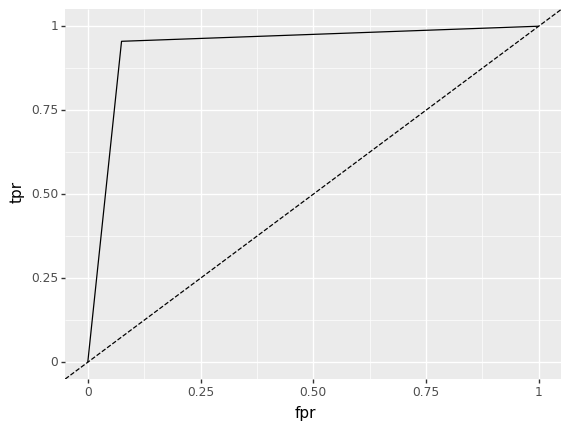

<ggplot: (8794592657141)>

In [49]:
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

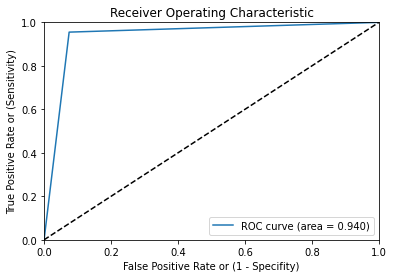

In [50]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

### Discounted Cumulative Gain [DCG]

In [51]:
from sklearn.metrics import ndcg_score, dcg_score

# Relevance scores in Ideal order
true_relevance = np.asarray([y_test])

# Relevance scores in output order
relevance_score = np.asarray([y_pred])

# DCG score
dcg = dcg_score(true_relevance, relevance_score)
print("DCG score : ", dcg)

DCG score :  1036.2101463615347


In [52]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


### Printing Classification Report

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     12528
           1       0.93      0.96      0.94     12472

    accuracy                           0.94     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000



## Introduction to Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
classifier_NB=GaussianNB()
classifier_NB.fit(X_train,y_train)

GaussianNB()

In [56]:
y_pred_NB = classifier_NB.predict(X_test)

In [57]:
y_pred_NB

array([1, 1, 0, ..., 1, 0, 1])

In [58]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


In [59]:
print(np.concatenate((y_pred_NB.reshape(len(y_pred_NB),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 0]]


In [60]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


### Confusion Matrix and Accuracy

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_NB = confusion_matrix(y_test, y_pred_NB)
print("Confusion Matrix \n")
print(cm_NB)

print("\n Accuracy")
accuracy_score(y_test, y_pred_NB)     

Confusion Matrix 

[[ 5711  6817]
 [  853 11619]]

 Accuracy


0.6932

In [62]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


### Precision

In [63]:
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision_positive_NB = metrics.precision_score(y_test, y_pred_NB, pos_label=1)
precision_negative_NB = metrics.precision_score(y_test, y_pred_NB, pos_label=0)
print("Positive Precision")
print(precision_positive_NB)
print("")
print("Negative Precision")
print(precision_negative_NB)

Positive Precision
0.6302343241484053

Negative Precision
0.8700487507617306


In [64]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


### Recall

In [65]:
recall_sensitivity_NB = metrics.recall_score(y_test, y_pred_NB, pos_label=1)
recall_specificity_NB = metrics.recall_score(y_test, y_pred_NB, pos_label=0)
print(recall_sensitivity, recall_specificity)

0.9550994227068633 0.9251277139208174


In [66]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


### F1 Score


In [67]:
f1_score_NB = 2*(precision_positive_NB * recall_sensitivity_NB) / (precision_positive_NB + recall_sensitivity_NB )
print("F1 Score")
print(f1_score_NB)

F1 Score
0.7518441827358613


In [68]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


### ROC curve

In [69]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr_NB, tpr_NB, threshold_NB = metrics.roc_curve(y_test, y_pred_NB)
roc_auc_NB = metrics.auc(fpr_NB, tpr_NB) 
print('ROC-AUC score', roc_auc_score(y_test,y_pred_NB))
print('ROC-AUC score', roc_auc_NB)

ROC-AUC score 0.6937328376738863
ROC-AUC score 0.6937328376738863


In [70]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


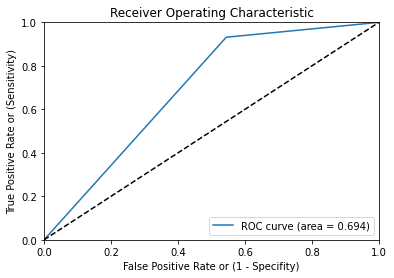

In [71]:
plt.plot(fpr_NB, tpr_NB, label='ROC curve (area = %0.3f)' % roc_auc_NB)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [72]:
print("The current time in india is :", current_time)

The current time in india is : 2022-08-25 23:16:54.860890+05:30


In [73]:
from sklearn.metrics import ndcg_score, dcg_score

# Relevance scores in Ideal order
true_relevance_NB = np.asarray([y_test])

# Relevance scores in output order
relevance_score_NB = np.asarray([y_pred_NB])

# DCG score
dcg_NB = dcg_score(true_relevance_NB, relevance_score_NB)
print("DCG score for naive bayes : ", dcg_NB)

DCG score for naive bayes :  989.6965442487457


### Printing Classification report 

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.87      0.46      0.60     12528
           1       0.63      0.93      0.75     12472

    accuracy                           0.69     25000
   macro avg       0.75      0.69      0.68     25000
weighted avg       0.75      0.69      0.67     25000

